In [ ]:
import re

In [ ]:
def find_wrong_indices(file_path):
    with open(file_path, 'r') as file:
        log_content = file.read()
    matches = re.findall(r'index: (\d+)[\s|\n|\|]+\|\sWrong!', log_content, re.DOTALL)
    wrong_indices = [int(match) for match in matches]
    return wrong_indices

file_path = '/home/yl3427/cylab/selfCorrectionAgent/result_mixtral.log'
# '/home/yl3427/cylab/selfCorrectionAgent/result_mixtral.log'
# '/home/yl3427/cylab/selfCorrectionAgent/result_llama3.log'

wrong_indices = find_wrong_indices(file_path)

print("Indices with 'Wrong!':", wrong_indices)


In [ ]:
len(wrong_indices)

In [ ]:
indices = []
for i in range(len(wrong_indices)-1):
    if wrong_indices[i] > wrong_indices[i+1]:
        print(i)
        print(wrong_indices[i: i+2])
        indices.append(i)


In [ ]:
idx1 = indices[0]+1
idx2 = indices[1]+1
base = set(wrong_indices[:idx1])
always = set(wrong_indices[idx1:idx2])
condition = set(wrong_indices[idx2:])

In [ ]:
len(base)

In [ ]:
len(base & always), base & always # 49

In [ ]:
len(base - always), base - always 

In [ ]:
len(always - base),always - base # 15

In [ ]:
import pandas as pd

brca_report = pd.read_csv("/secure/shared_data/rag_tnm_results/summary/5_folds_summary/brca_df.csv")
sample_reports = brca_report.iloc[:500, :]

sample_reports

In [ ]:
for i in sorted(always - base):
    print(f"T{sample_reports.iloc[i].t+1}")

In [ ]:
def find_similarity(file_path):
    with open(file_path, 'r') as file:
        log_content = file.read()
    matches = re.findall(r'similarity: (\d+)', log_content, re.DOTALL)
    scores = [int(match) for match in matches]
    return scores

file_path = '/home/yl3427/cylab/selfCorrectionAgent/result_llama3.log'

# '/home/yl3427/cylab/selfCorrectionAgent/result_mixtral.log'
# '/home/yl3427/cylab/selfCorrectionAgent/result_llama3.log'

similarity_scores = find_similarity(file_path)

print(similarity_scores)


In [ ]:
len(similarity_scores)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

index = range(0, 500)


# Plotting
plt.figure(figsize=(10, 5))
plt.plot(index, similarity_scores)
plt.xlabel('index of report')
plt.ylabel('similiarity between created rules and the existing rules (memory)')
plt.xlim(0, 500)
plt.xticks(np.arange(0, 501, 25))  # Adjust the interval as needed
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

index = range(0, 80)


# Plotting
plt.figure(figsize=(10, 5))
plt.plot(index, similarity_scores[:80])
plt.xlabel('index of report')
plt.ylabel('similiarity between created rules and the existing rules (memory)')
plt.xlim(0, 80)
plt.xticks(np.arange(0, 80, 5))  # Adjust the interval as needed
plt.legend()
plt.show()


In [ ]:
import ast

In [ ]:
def find_memory(file_path):
    with open(file_path, 'r') as file:
        log_content = file.read()
    matches = re.findall(r" memory: (\[.*?\])", log_content, re.DOTALL)
    wrong_indices = [ast.literal_eval(match) for match in matches]
    return wrong_indices

file_path = '/home/yl3427/cylab/selfCorrectionAgent/memory.txt'


wrong_indices = find_memory(file_path)

print(len(wrong_indices))
print(wrong_indices)

In [1]:
import pandas as pd
import re
from src.metrics import t14_performance_report, n03_performance_report, relax_t14_performance_report, relax_n03_performance_report

In [16]:
print("zshot")
df = pd.read_csv("result/t14/brca_df_zs_t14.csv")
t14_performance_report(df, "zs_t_ans_str")
print()

for size in range(10, 101, 5):
    print(f"conditional memory, test size: {size}")
    df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/result/n03/saturation_test_result_{size}.csv")
    n03_performance_report(df, "cmem_n_ans_str")
    relax_n03_performance_report(df, "cmem_n_ans_str")
    print()

zshot
              precision    recall  f1-score   support

          T1       0.92      0.71      0.80       188
          T2       0.83      0.96      0.89       468
          T3       0.91      0.74      0.82       108
          T4       0.74      0.64      0.69        36

    accuracy                           0.85       800
   macro avg       0.85      0.76      0.80       800
weighted avg       0.86      0.85      0.85       800


conditional memory, test size: 10
              precision    recall  f1-score   support

          N0       0.94      0.95      0.95       315
          N1       0.86      0.90      0.88       295
          N2       0.68      0.74      0.71       108
          N3       1.00      0.67      0.80        72

    accuracy                           0.88       790
   macro avg       0.87      0.81      0.83       790
weighted avg       0.88      0.88      0.88       790



/home/yl3427/miniconda3/envs/selfCorrection/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2628: UserWarning: labels size, 4, does not match size of target_names, 5
  warnings.warn(
/home/yl3427/miniconda3/envs/selfCorrection/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yl3427/miniconda3/envs/selfCorrection/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yl3427/miniconda3/envs/selfCorrection/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: Undefin

              precision    recall  f1-score   support

          N0       0.94      0.95      0.95       315
          N1       0.86      0.90      0.88       295
          N2       0.68      0.74      0.71       108
          N3       1.00      0.67      0.80        72

    accuracy                           0.88       790
   macro avg       0.87      0.81      0.83       790
weighted avg       0.88      0.88      0.88       790


conditional memory, test size: 15
              precision    recall  f1-score   support

          N0       0.94      0.97      0.95       306
          N1       0.89      0.84      0.87       290
          N2       0.67      0.81      0.73       108
          N3       0.96      0.75      0.84        71

    accuracy                           0.88       775
   macro avg       0.87      0.84      0.85       775
weighted avg       0.89      0.88      0.88       775

              precision    recall  f1-score   support

          N0       0.94      0.95      0

/home/yl3427/miniconda3/envs/selfCorrection/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yl3427/miniconda3/envs/selfCorrection/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yl3427/miniconda3/envs/selfCorrection/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

              precision    recall  f1-score   support

          N0       0.95      0.97      0.96       310
          N1       0.90      0.84      0.87       292
          N2       0.65      0.76      0.70       106
          N3       0.90      0.76      0.83        72
         Unk       0.00      0.00      0.00         0

    accuracy                           0.88       780
   macro avg       0.68      0.67      0.67       780
weighted avg       0.88      0.88      0.88       780


conditional memory, test size: 25
              precision    recall  f1-score   support

          N0       0.94      0.98      0.96       308
          N1       0.89      0.88      0.89       286
          N2       0.72      0.70      0.71       107
          N3       0.88      0.79      0.83        72

    accuracy                           0.89       773
   macro avg       0.86      0.84      0.85       773
weighted avg       0.89      0.89      0.89       773

              precision    recall  f1-sco

/home/yl3427/miniconda3/envs/selfCorrection/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yl3427/miniconda3/envs/selfCorrection/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yl3427/miniconda3/envs/selfCorrection/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

              precision    recall  f1-score   support

          N0       0.94      0.71      0.81       302
          N1       0.82      0.86      0.84       289
          N2       0.79      0.62      0.69       108
          N3       0.91      0.69      0.78        71
         Unk       0.00      0.00      0.00         0

    accuracy                           0.75       770
   macro avg       0.69      0.58      0.63       770
weighted avg       0.87      0.75      0.80       770


conditional memory, test size: 35
              precision    recall  f1-score   support

          N0       0.94      0.93      0.93       300
          N1       0.84      0.89      0.87       285
          N2       0.70      0.69      0.69       107
          N3       1.00      0.77      0.87        70

    accuracy                           0.87       762
   macro avg       0.87      0.82      0.84       762
weighted avg       0.87      0.87      0.87       762

              precision    recall  f1-sco

/home/yl3427/miniconda3/envs/selfCorrection/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yl3427/miniconda3/envs/selfCorrection/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yl3427/miniconda3/envs/selfCorrection/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

              precision    recall  f1-score   support

          N0       0.94      0.96      0.95       304
          N1       0.90      0.84      0.87       282
          N2       0.68      0.77      0.72       104
          N3       0.90      0.79      0.84        70
         Unk       0.00      0.00      0.00         0

    accuracy                           0.88       760
   macro avg       0.69      0.67      0.68       760
weighted avg       0.89      0.88      0.88       760


conditional memory, test size: 45
              precision    recall  f1-score   support

          N0       0.93      0.98      0.95       299
          N1       0.89      0.88      0.88       284
          N2       0.71      0.70      0.71       100
          N3       0.90      0.80      0.85        70

    accuracy                           0.89       753
   macro avg       0.86      0.84      0.85       753
weighted avg       0.88      0.89      0.88       753

              precision    recall  f1-sco

/home/yl3427/miniconda3/envs/selfCorrection/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yl3427/miniconda3/envs/selfCorrection/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yl3427/miniconda3/envs/selfCorrection/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

              precision    recall  f1-score   support

          N0       0.96      0.90      0.93       301
          N1       0.86      0.89      0.88       275
          N2       0.71      0.75      0.73       103
          N3       0.89      0.76      0.82        71
         Unk       0.00      0.00      0.00         0

    accuracy                           0.86       750
   macro avg       0.68      0.66      0.67       750
weighted avg       0.88      0.86      0.87       750


conditional memory, test size: 55
              precision    recall  f1-score   support

          N0       0.94      0.98      0.96       282
          N1       0.90      0.87      0.88       278
          N2       0.73      0.77      0.75       103
          N3       0.92      0.82      0.86        66

    accuracy                           0.89       729
   macro avg       0.87      0.86      0.86       729
weighted avg       0.89      0.89      0.89       729

              precision    recall  f1-sco

/home/yl3427/miniconda3/envs/selfCorrection/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yl3427/miniconda3/envs/selfCorrection/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yl3427/miniconda3/envs/selfCorrection/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

              precision    recall  f1-score   support

          N0       0.94      0.95      0.95       299
          N1       0.91      0.87      0.89       277
          N2       0.68      0.77      0.72        97
          N3       0.98      0.75      0.85        67
         Unk       0.00      0.00      0.00         0

    accuracy                           0.88       740
   macro avg       0.70      0.67      0.68       740
weighted avg       0.90      0.88      0.89       740


conditional memory, test size: 65
              precision    recall  f1-score   support

          N0       0.93      0.98      0.96       286
          N1       0.88      0.88      0.88       277
          N2       0.73      0.72      0.72       106
          N3       0.96      0.78      0.86        65

    accuracy                           0.89       734
   macro avg       0.88      0.84      0.86       734
weighted avg       0.89      0.89      0.89       734

              precision    recall  f1-sco

/home/yl3427/miniconda3/envs/selfCorrection/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yl3427/miniconda3/envs/selfCorrection/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yl3427/miniconda3/envs/selfCorrection/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

              precision    recall  f1-score   support

          N0       0.93      0.97      0.95       292
          N1       0.89      0.87      0.88       271
          N2       0.76      0.69      0.72       103
          N3       0.84      0.84      0.84        64
         Unk       0.00      0.00      0.00         0

    accuracy                           0.88       730
   macro avg       0.68      0.67      0.68       730
weighted avg       0.88      0.88      0.88       730


conditional memory, test size: 75
              precision    recall  f1-score   support

          N0       0.93      0.98      0.95       286
          N1       0.87      0.89      0.88       271
          N2       0.74      0.68      0.71       100
          N3       0.94      0.76      0.84        66

    accuracy                           0.88       723
   macro avg       0.87      0.83      0.85       723
weighted avg       0.88      0.88      0.88       723

              precision    recall  f1-sco

/home/yl3427/miniconda3/envs/selfCorrection/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yl3427/miniconda3/envs/selfCorrection/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yl3427/miniconda3/envs/selfCorrection/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

              precision    recall  f1-score   support

          N0       0.94      0.96      0.95       282
          N1       0.89      0.90      0.90       273
          N2       0.73      0.75      0.74        97
          N3       0.96      0.74      0.83        68
         Unk       0.00      0.00      0.00         0

    accuracy                           0.89       720
   macro avg       0.70      0.67      0.68       720
weighted avg       0.90      0.89      0.89       720


conditional memory, test size: 85
              precision    recall  f1-score   support

          N0       0.93      0.98      0.96       277
          N1       0.89      0.84      0.87       268
          N2       0.65      0.73      0.69       100
          N3       0.95      0.77      0.85        69

    accuracy                           0.87       714
   macro avg       0.85      0.83      0.84       714
weighted avg       0.88      0.87      0.87       714

              precision    recall  f1-sco

/home/yl3427/miniconda3/envs/selfCorrection/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2628: UserWarning: labels size, 4, does not match size of target_names, 5
  warnings.warn(
/home/yl3427/miniconda3/envs/selfCorrection/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yl3427/miniconda3/envs/selfCorrection/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yl3427/miniconda3/envs/selfCorrection/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: Undefin

              precision    recall  f1-score   support

          N0       0.93      0.98      0.96       274
          N1       0.87      0.91      0.89       266
          N2       0.77      0.70      0.73       105
          N3       0.94      0.71      0.81        65

    accuracy                           0.89       710
   macro avg       0.88      0.82      0.85       710
weighted avg       0.88      0.89      0.88       710


conditional memory, test size: 95
              precision    recall  f1-score   support

          N0       0.95      0.98      0.96       266
          N1       0.92      0.78      0.84       264
          N2       0.54      0.83      0.65        96
          N3       1.00      0.69      0.81        64

    accuracy                           0.86       690
   macro avg       0.85      0.82      0.82       690
weighted avg       0.89      0.86      0.86       690

              precision    recall  f1-score   support

          N0       0.95      0.95      0

/home/yl3427/miniconda3/envs/selfCorrection/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yl3427/miniconda3/envs/selfCorrection/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yl3427/miniconda3/envs/selfCorrection/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [25]:
print("train size: 80")
print()
for fold in range(5):
    print(f" {fold} fold")
    df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/result/n03/{fold}_fold_saturation_test_result_80.csv")
    n03_performance_report(df, "cmem_n_ans_str")
    # relax_n03_performance_report(df, "cmem_n_ans_str")
    print()

train size: 80

 0 fold
              precision    recall  f1-score   support

          N0       0.93      0.96      0.95       253
          N1       0.88      0.84      0.86       244
          N2       0.70      0.76      0.73        86
          N3       0.89      0.80      0.85        51

    accuracy                           0.87       634
   macro avg       0.85      0.84      0.84       634
weighted avg       0.88      0.87      0.87       634


 1 fold
              precision    recall  f1-score   support

          N0       0.94      0.97      0.95       240
          N1       0.92      0.77      0.84       243
          N2       0.53      0.88      0.67        78
          N3       1.00      0.69      0.82        61

    accuracy                           0.85       622
   macro avg       0.85      0.83      0.82       622
weighted avg       0.89      0.85      0.86       622


 2 fold
              precision    recall  f1-score   support

          N0       0.96      0.99

In [20]:
# /home/yl3427/cylab/selfCorrectionAgent/result/n03/saturation_test_result_80.csv
df = pd.read_csv("/home/yl3427/cylab/selfCorrectionAgent/result/t14/memory_test_result_80.csv")
t14_performance_report(df, "mem_t_ans_str")
# relax_n03_performance_report(df, "mem_n_ans_str")

              precision    recall  f1-score   support

          T1       0.90      0.86      0.88       177
          T2       0.89      0.95      0.92       418
          T3       0.88      0.84      0.86        91
          T4       0.82      0.53      0.64        34

    accuracy                           0.89       720
   macro avg       0.87      0.79      0.83       720
weighted avg       0.89      0.89      0.89       720



In [21]:
df = pd.read_csv("/home/yl3427/cylab/selfCorrectionAgent/result/n03/memory_test_result_80.csv")
n03_performance_report(df, "mem_n_ans_str")

              precision    recall  f1-score   support

          N0       0.95      0.98      0.97       288
          N1       0.91      0.89      0.90       263
          N2       0.77      0.78      0.77        92
          N3       0.93      0.84      0.89        64

    accuracy                           0.91       707
   macro avg       0.89      0.87      0.88       707
weighted avg       0.91      0.91      0.91       707



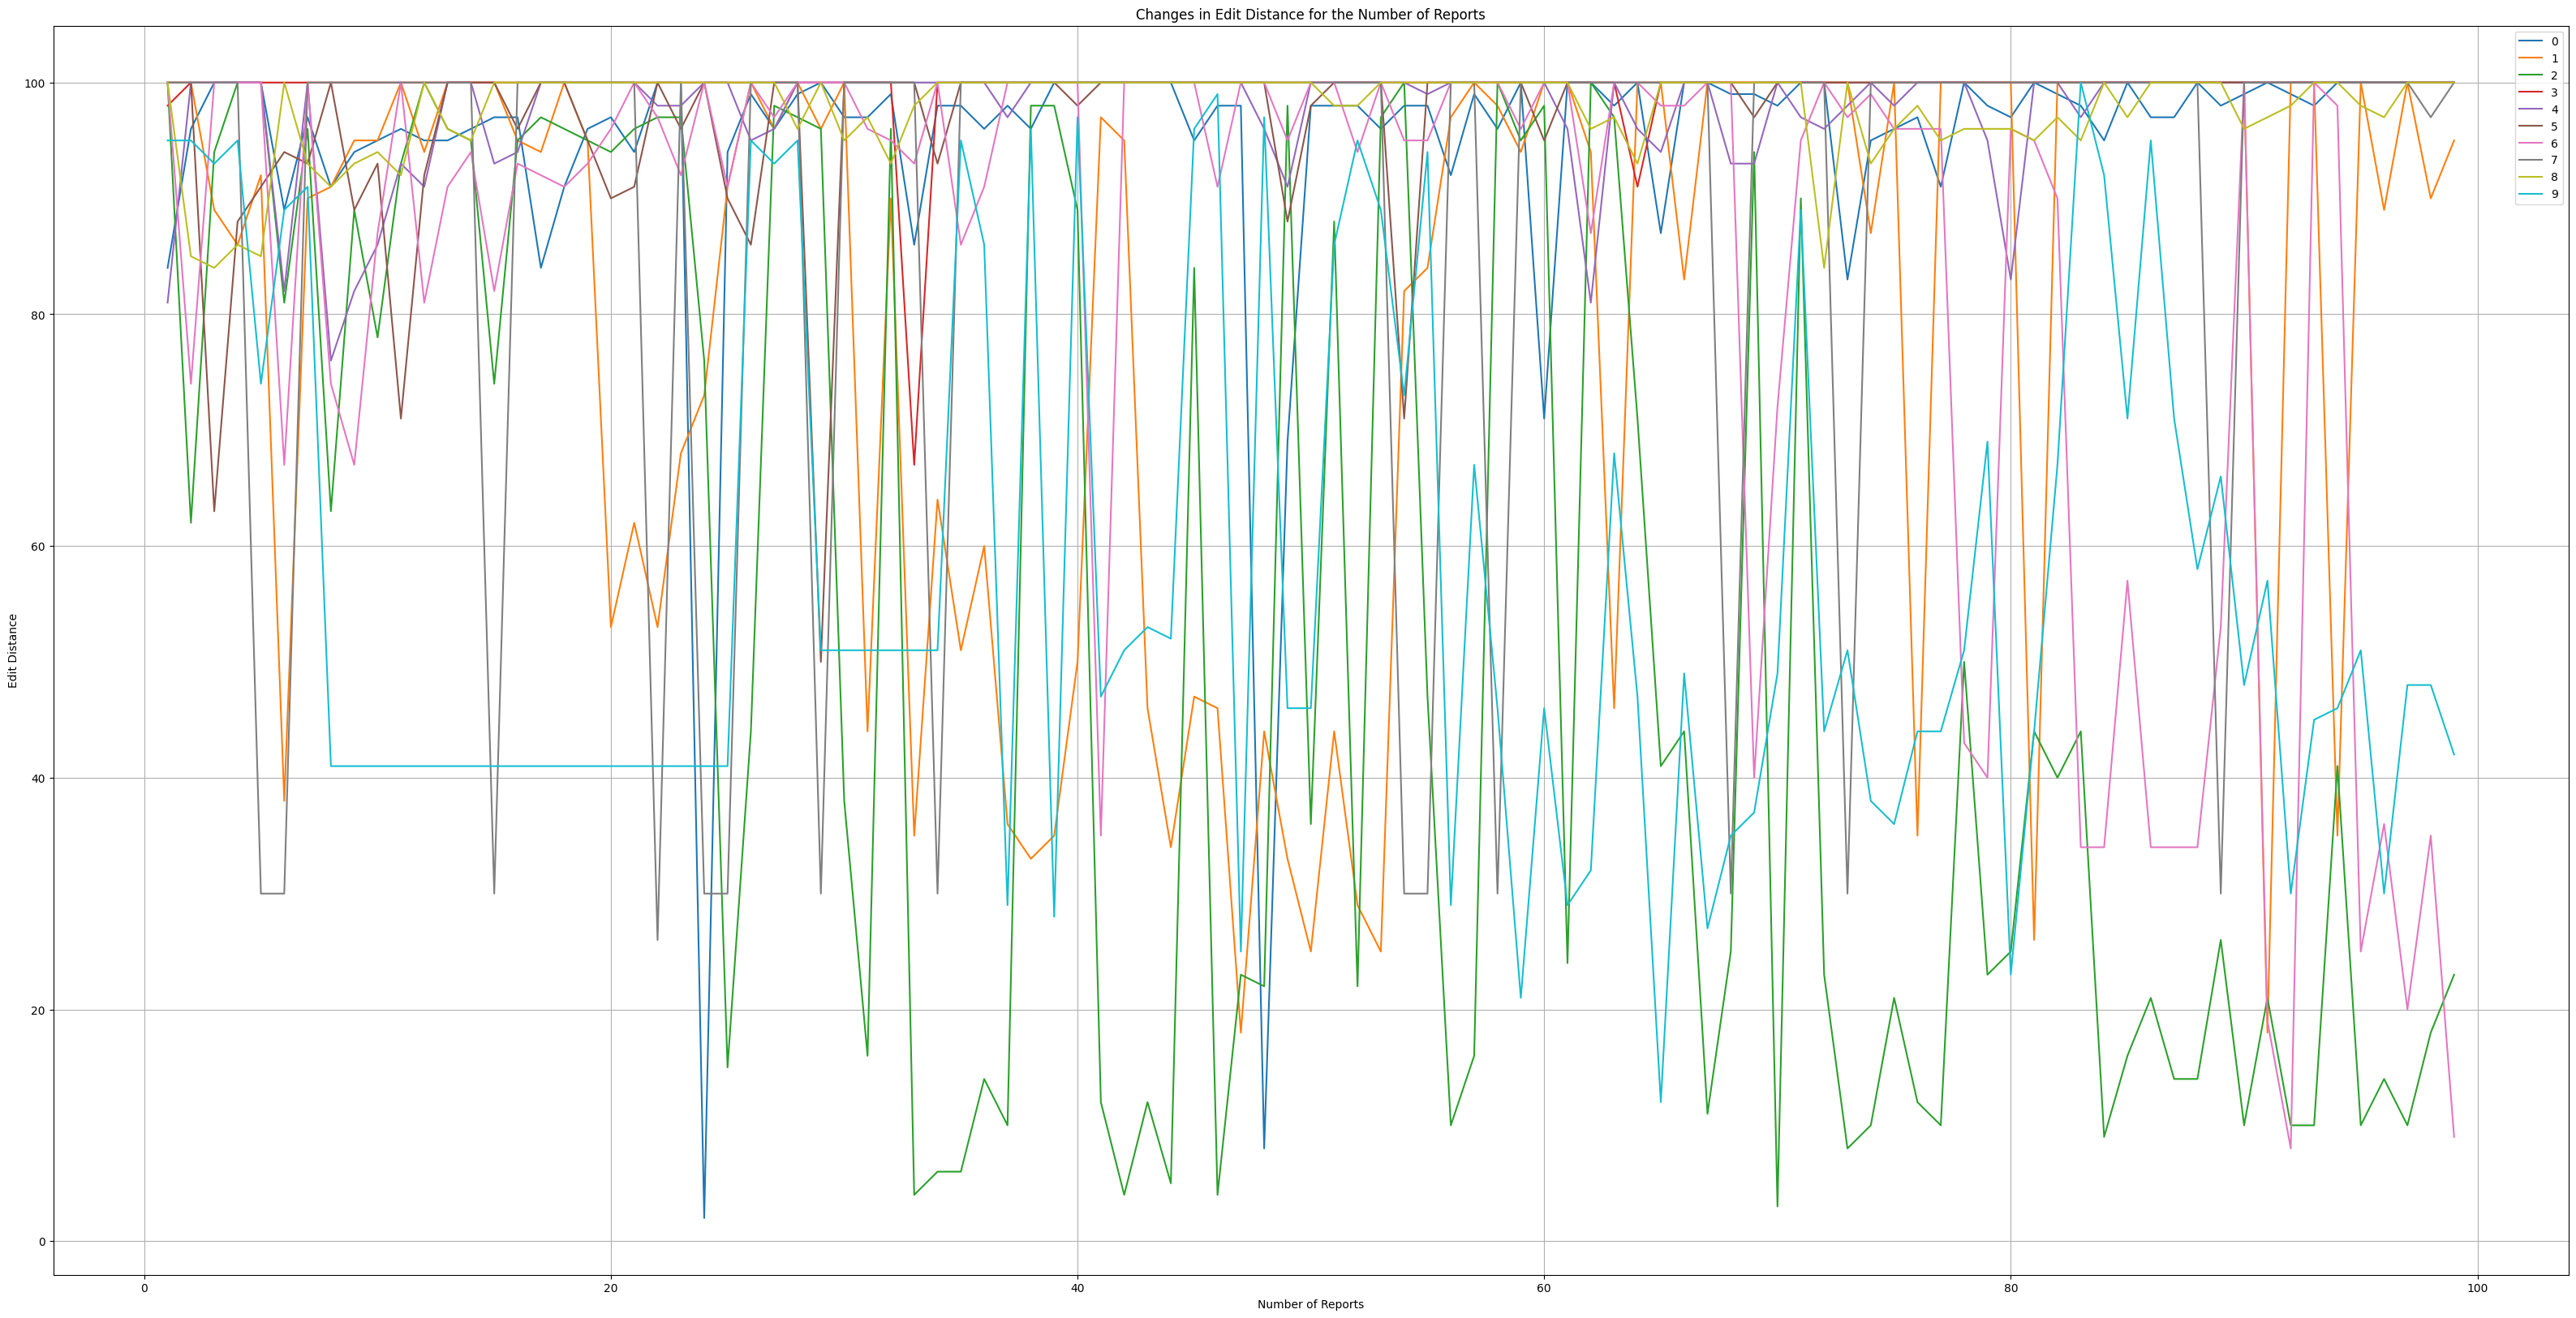

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import os

plt.figure(figsize=(40, 20))

for idx in range(10):

    file_path =  f"/home/yl3427/cylab/selfCorrectionAgent/result/t14_train_{idx}.csv"
    data = pd.read_csv(file_path)
    data['cmem_t_edit_distance'] = pd.to_numeric(data['cmem_t_edit_distance'])
    plt.plot(data.index, data['cmem_t_edit_distance'], label=idx)
    
plt.xlabel('Number of Reports')
plt.ylabel('Edit Distance')
plt.title('Changes in Edit Distance for the Number of Reports')
plt.legend()
plt.grid(True)

plt.savefig('combined_plot.png')
plt.show()


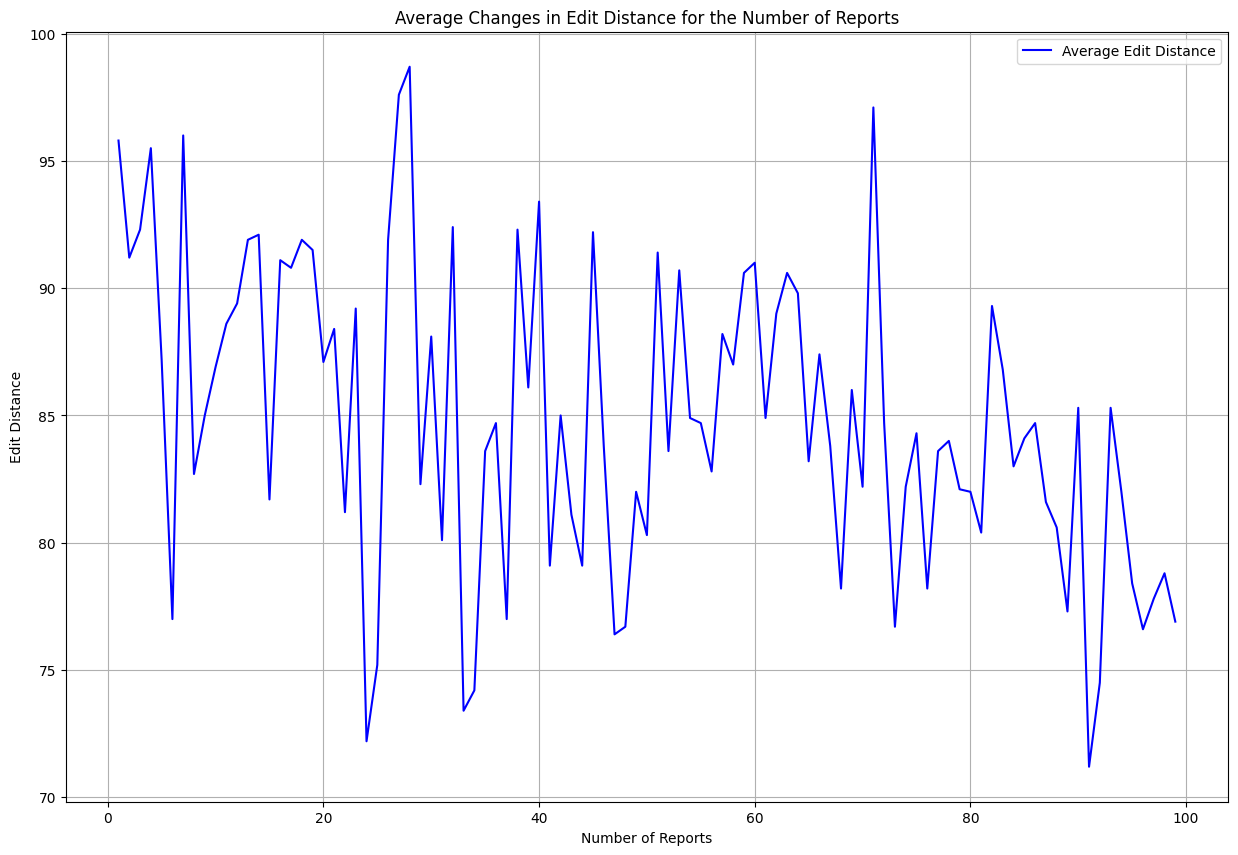

In [12]:
data_frames = []

for idx in range(10):
    file_path =  f"/home/yl3427/cylab/selfCorrectionAgent/result/t14_train_{idx}.csv"
    data = pd.read_csv(file_path)
    data['cmem_t_edit_distance'] = pd.to_numeric(data['cmem_t_edit_distance'])
    data_frames.append(data['cmem_t_edit_distance'])

combined_data = pd.concat(data_frames, axis=1)
average_data = combined_data.mean(axis=1)

plt.figure(figsize=(15, 10))
plt.plot(average_data, label='Average Edit Distance', color='blue')

plt.xlabel('Number of Reports')
plt.ylabel('Edit Distance')
plt.title('Average Changes in Edit Distance for the Number of Reports')
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig('average_edit_distance_plot.png')
plt.show()